\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

In [2]:
from ipywidgets import *
from numpy import sin, cos, sqrt, pi, radians, linspace
import matplotlib.pyplot as plt

In [3]:
def ar(m1, m2, l, a0):
    return v0*sqrt(m1)*sqrt(l)*sin(sqrt(g)*sqrt(m1+m2)*t/(sqrt(m1)*sqrt(l)))/(sqrt(g)*sqrt(m1+m2))+a0*cos(sqrt(g)*sqrt(m1+m2)*t/(sqrt(m1)*sqrt(l)))

def xr(m1, m2, l, a0):
    return -(1.0/(m1+m2))*(sin(sqrt(g)*sqrt(m1+m2)*t/(sqrt(m1)*sqrt(l)))*l**(3.0/2.0)*v0*sqrt(m1)*m2/(sqrt(g)*sqrt(m1+m2))+cos(sqrt(g)*sqrt(m1+m2)*t/(sqrt(m1)*sqrt(l)))*a0*l*m2-(l*v0*m2*t*m1/(m1+m2))-(l*v0*(m2**2.0)*t/(m1+m2))-((a0*l*m2+m1*x0+m2*x0)*m1/(m1+m2))-((a0*l*m2+m1*x0+m2*x0)*m2/(m1+m2)))
    
def x1(m1, m2, l, a0):
    return xr(m1, m2, l, a0)

def x2(m1, m2, l, a0):
    return xr(m1, m2, l, a0)+l*sin(ar(m1, m2, l, a0))

def y2(m1, m2, l, a0):
    return -l*cos(ar(m1, m2, l, a0))

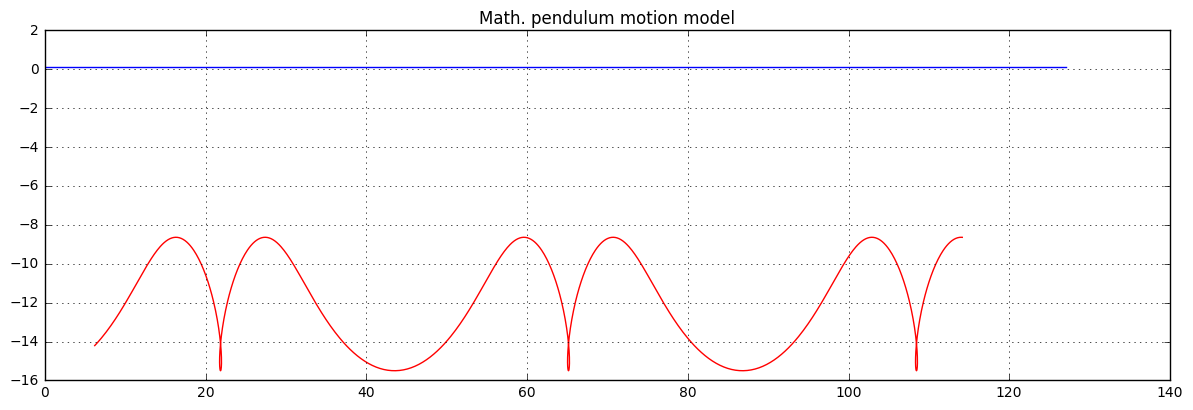

In [4]:
quality = 1000
t = linspace(0.0, 15.0, quality)
g, v0, x0 = 9.8, 1.0, 0.0

def plt_interactive(mass_1, mass_2, length, angle):
    plt.subplots_adjust(top=1.0, right=2.0, wspace=0.10, hspace=0.30)
    plt.subplot(111)
    plt.autoscale(enable=True, axis='both')
    plt.title("Math. pendulum motion model")
    plt.grid(True)
    plt.plot(x1(mass_1, mass_2, length, angle), [0.1 for i in range(len(t))], 'b')
    plt.plot(x2(mass_1, mass_2, length, angle), y2(mass_1, mass_2, length, angle), 'r')
    
    x = linspace(0.0, 15.0, quality)
    a = linspace(0.0, 15.0, quality)
    y = linspace(0.0, 15.0, quality)
    b = linspace(0.0, 15.0, quality)
    x[0], a[0], y[0], b[0], del_t = x0, angle, v0, sqrt(g/length), t[1]-t[0] 
    for i in range(0, len(t)-1):
        x[i+1] = x[i] + del_t * y[i]
        a[i+1] = a[i] + del_t * b[0]
        y[i+1] = y[i] + (mass_1 / mass_2) * g * a[i] * del_t
        b[i+1] = b[i] - del_t * ((mass_1 + mass_2) / mass_1) * (g/length) * a[i]
    
    plt.show()

interact(plt_interactive, mass_1=(1.0, 30.0), mass_2=(1.0, 30.0), length=(1.0, 30.0), angle=(pi/85.0, pi/4.0));